In [ ]:
from preset import set_proxy_and_token
set_proxy_and_token()

In [1]:
from diffusers import DiffusionPipeline

model_id = "stable-diffusion-v1-5/stable-diffusion-v1-5"
pipeline = DiffusionPipeline.from_pretrained(model_id, use_safetensors=True)

2025-02-02 16:31:38.401886: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-02 16:31:38.456378: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738485098.495078   19903 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738485098.506819   19903 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-02 16:31:38.563658: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [12]:
prompt = "A transparent glowing blue acrylic panel with intricate illuminated circuitry patterns embedded inside, featuring a miniature cyberpunk cityscape constructed from layered acrylic structures, neon-lit futuristic skyscrapers with holographic interfaces, glowing circuit pathways connecting buildings, vibrant electric blue and purple color scheme, dark sci-fi atmosphere with technological details, translucent layers creating depth, cyberpunk aesthetic with contrast between advanced technology and dystopian urban decay, cinematic lighting with neon reflections on acrylic surfaces"

In [4]:
pipeline = pipeline.to("cuda")

In [6]:
import torch
generator = torch.Generator(device="cuda").manual_seed(0)

Token indices sequence length is longer than the specified maximum sequence length for this model (89 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['dystopian urban decay , cinematic lighting with neon reflections on acrylic surfaces']


  0%|          | 0/50 [00:00<?, ?it/s]

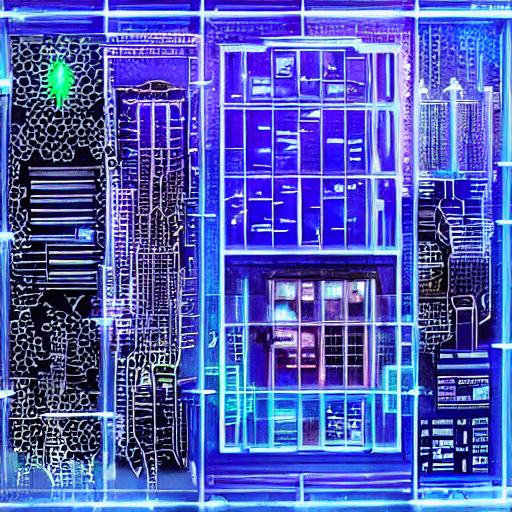

In [13]:
image = pipeline(prompt, generator=generator).images[0]
image

In [ ]:
import torch

pipeline = DiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, use_safetensors=True)
pipeline = pipeline.to("cuda")
generator = torch.Generator("cuda").manual_seed(0)
image = pipeline(prompt, generator=generator).images[0]
image

In [ ]:
pipeline.scheduler.compatibles

In [ ]:
from diffusers import DPMSolverMultistepScheduler

pipeline.scheduler = DPMSolverMultistepScheduler.from_config(pipeline.scheduler.config)

In [ ]:
generator = torch.Generator("cuda").manual_seed(0)
image = pipeline(prompt, generator=generator, num_inference_steps=20).images[0]
image

In [7]:
def get_inputs(batch_size=1):
    generator = [torch.Generator("cuda").manual_seed(i) for i in range(batch_size)]
    prompts = batch_size * [prompt]
    num_inference_steps = 20

    return {"prompt": prompts, "generator": generator, "num_inference_steps": num_inference_steps}

In [ ]:
from diffusers.utils import make_image_grid

pipeline.enable_attention_slicing()
images = pipeline(**get_inputs(batch_size=16)).images
make_image_grid(images, 4, 4)